**IMPORTANTE: caso já tenha baixado a pasta colmap_project, inicie pela etapa 5.1 para as visualizações**

In [1]:
import pycolmap
from pathlib import Path
import shutil
import urllib.request
import zipfile
import io
import matplotlib.pyplot as plt
from PIL import Image

### Passo 1: Download e Preparação do Conjunto de Dados

Para este exemplo, usaremos o conjunto de dados "fox" do site oficial do COLMAP. O código abaixo irá baixá-lo e extraí-lo para a nossa pasta de imagens.

**IMPORTANTE: rodar a célula abaixo somente se for testar o código com o database de exemplo.**

Diretórios do projeto criados em: /home/jasmine/Documents/Repos/MC949_Visao_Computacional/Trabalho 2/colmap_project
Tentando baixar: https://github.com/colmap/colmap/releases/download/3.11.1/south-building.zip
Download concluído.
Extraindo imagens...
Extração concluída. 128 imagens salvas em colmap_project/images


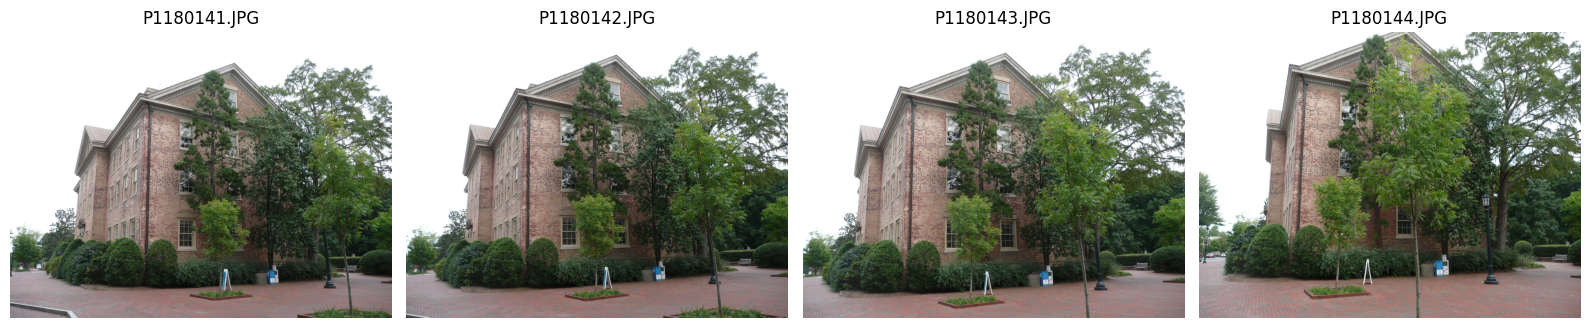

In [3]:
# Imports necessários
from pathlib import Path
import shutil, io, zipfile, urllib.request, urllib.error
from PIL import Image
import matplotlib.pyplot as plt

# Limpa execuções anteriores
project_path = Path('colmap_project')
if project_path.exists():
    shutil.rmtree(project_path)

# Diretórios
image_path = project_path / 'images'
database_path = project_path / 'database.db'
output_path = project_path / 'sparse'
project_path.mkdir(parents=True, exist_ok=True)
image_path.mkdir(exist_ok=True)
output_path.mkdir(exist_ok=True)
print(f"Diretórios do projeto criados em: {project_path.resolve()}")

# URLs de datasets oficiais (substituem o antigo 'fox.zip')
dataset_urls = [
    # South Building (preferido)
    "https://github.com/colmap/colmap/releases/download/3.11.1/south-building.zip",
    # Fallback: Gerrard Hall
    "https://github.com/colmap/colmap/releases/download/3.11.1/gerrard-hall.zip",
]

# Função para baixar conteúdo em memória
def fetch(url):
    print(f"Tentando baixar: {url}")
    with urllib.request.urlopen(url) as resp:
        return resp.read()

# Baixa o primeiro dataset disponível
data = None
last_err = None
for url in dataset_urls:
    try:
        data = fetch(url)
        print("Download concluído.")
        break
    except urllib.error.HTTPError as e:
        print(f"Falhou ({e.code}): {url}")
        last_err = e
    except urllib.error.URLError as e:
        print(f"Falhou (rede): {url} -> {e.reason}")
        last_err = e

if data is None:
    raise RuntimeError(f"Não foi possível baixar nenhum dataset. Último erro: {last_err}")

# Extrai apenas arquivos de imagem para image_path/
print("Extraindo imagens...")
valid_exts = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')
with zipfile.ZipFile(io.BytesIO(data)) as z:
    n_imgs = 0
    for member in z.infolist():
        name = member.filename
        # Ignora diretórios
        if name.endswith('/'):
            continue
        # Mantém apenas imagens (em qualquer subpasta do zip)
        if name.lower().endswith(valid_exts):
            # Lê do zip e grava achatando a árvore em image_path/
            with z.open(member) as src:
                out_file = image_path / Path(name).name
                with open(out_file, 'wb') as dst:
                    dst.write(src.read())
            n_imgs += 1

print(f"Extração concluída. {n_imgs} imagens salvas em {image_path}")

# Visualiza algumas imagens
image_files = sorted(image_path.glob('*'))
if len(image_files) == 0:
    raise RuntimeError("Nenhuma imagem foi encontrada após a extração.")

ncols = min(4, len(image_files))
plt.figure(figsize=(16, 4))
for i, img_file in enumerate(image_files[:ncols], start=1):
    plt.subplot(1, ncols, i)
    img = Image.open(img_file)
    plt.imshow(img)
    plt.title(img_file.name)
    plt.axis('off')
plt.tight_layout()
plt.show()

### Passo 1 (Alterado): Usando Imagens de uma Pasta Local

Esta etapa agora aponta para um diretório local chamado "imagens-t2/Imagens4".

Ação Necessária: Crie uma pasta chamada imagens-t2/Imagens4 no mesmo diretório onde este notebook está salvo e coloque suas imagens de objeto nela.

**IMPORTANTE: rodar a célula abaixo somente se for executar o código com as imagens capturadas para o projeto.**

Diretórios do projeto para a base de dados e saídas criados em: /home/viniasbr/Repos/MC949_Visao_Computacional/Trabalho 2/colmap_project
Usando imagens da pasta local: '/home/viniasbr/Repos/MC949_Visao_Computacional/Trabalho 2/imagens-t2/Imagens3'
Encontradas 132 imagens.


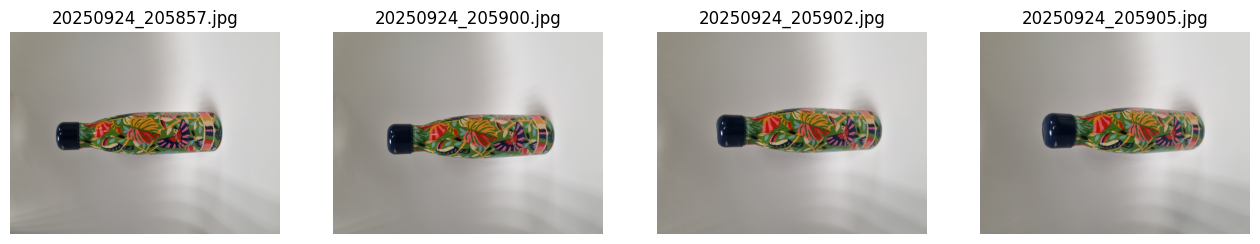

In [2]:
# Limpa execuções anteriores para garantir um começo limpo
if Path('colmap_project').exists():
    shutil.rmtree('colmap_project')

# Define os diretórios para os arquivos gerados pelo COLMAP
project_path = Path('colmap_project')
database_path = project_path / 'database.db'
output_path = project_path / 'sparse'

# Cria os diretórios para o projeto (exceto o de imagens, que será local)
project_path.mkdir(exist_ok=True)
output_path.mkdir(exist_ok=True)

print(f"Diretórios do projeto para a base de dados e saídas criados em: {project_path.resolve()}")

# Define o caminho para a pasta de imagens local
image_path = Path('imagens-t2/Imagens3')

# Verifica se a pasta existe e não está vazia
if not image_path.exists() or not any(image_path.iterdir()):
    print("="*80)
    print(f"ERRO: A pasta '{image_path}' não foi encontrada ou está vazia.")
    print("Por favor, crie esta pasta no mesmo diretório do notebook e adicione suas imagens.")
    print("="*80)
    # Lança um erro para parar a execução do notebook
    raise FileNotFoundError(f"A pasta de imagens '{image_path}' está faltando ou vazia.")
else:
    print(f"Usando imagens da pasta local: '{image_path.resolve()}'")

# Vamos visualizar algumas das imagens para confirmar
image_files = sorted(list(image_path.glob('*.[jJ][pP][gG]')) + list(image_path.glob('*.[pP][nN][gG]')))
print(f"Encontradas {len(image_files)} imagens.")

fig, axes = plt.subplots(1, min(4, len(image_files)), figsize=(16, 4))
if len(image_files) > 1:
    for i, img_file in enumerate(image_files[:4]):
        img = Image.open(img_file)
        axes[i].imshow(img)
        axes[i].set_title(img_file.name)
        axes[i].axis('off')
elif len(image_files) == 1:
    img = Image.open(image_files[0])
    axes.imshow(img)
    axes.set_title(image_files[0].name)
    axes.axis('off')
    
plt.show()

In [7]:
THRESHOLDS = [0.5, 1.0, 2.0, 4.0, 8.0]

def thr_tag(t):
    """Converte 0.5 -> '0p5' para nomear arquivos/pastas."""
    return str(t).replace('.', 'p')

### Passo 2: Extração de Features (Keypoints)

Neste passo, o COLMAP analisará cada imagem para encontrar pontos de interesse distintos (features). Pelo que foi pesquisado, o algoritmo usado é o SIFT.

Atenção: Se você tiver uma GPU NVIDIA com CUDA configurado, pode definir use_gpu=True para uma aceleração massiva.

In [3]:
# Configurações para a extração de features
feature_options = pycolmap.SiftExtractionOptions()
feature_options.use_gpu = True # Mude para True se tiver uma GPU compatível
feature_options.num_threads = 6

# Executa a extração
pycolmap.extract_features(database_path, image_path, sift_options=feature_options)

print("Extração de features concluída.")

I20251001 02:11:13.896833 128998234003136 misc.cc:44] 
Feature extraction
I20251001 02:11:13.897252 128998101202624 sift.cc:727] Creating SIFT CPU feature extractor
I20251001 02:11:13.897307 128998092809920 sift.cc:727] Creating SIFT CPU feature extractor
I20251001 02:11:13.897334 128998084417216 sift.cc:727] Creating SIFT CPU feature extractor
I20251001 02:11:13.897380 128997933446848 sift.cc:727] Creating SIFT CPU feature extractor
I20251001 02:11:13.897412 128997925054144 sift.cc:727] Creating SIFT CPU feature extractor
I20251001 02:11:13.897477 128997916661440 sift.cc:727] Creating SIFT CPU feature extractor
I20251001 02:11:22.164883 128997908268736 feature_extraction.cc:259] Processed file [1/132]
I20251001 02:11:22.164936 128997908268736 feature_extraction.cc:262]   Name:            20250924_205857.jpg
I20251001 02:11:22.164944 128997908268736 feature_extraction.cc:271]   Dimensions:      4000 x 3000
I20251001 02:11:22.164947 128997908268736 feature_extraction.cc:274]   Camera:  

Extração de features concluída.


I20251001 02:12:29.508570 128998234003136 timer.cc:91] Elapsed time: 1.260 [minutes]


### Passo 3: Correspondência de Features (Matching)

Agora, o COLMAP irá comparar as features extraídas entre todas as imagens para encontrar correspondências (matches). Pelo que foi pesquisado, o algoritmo utilizado é: Nearest Neighbor + Verificação Geométrica com RANSAC.

In [14]:
# 1) Matching exaustivo (uma única vez, fixo para todo o ablation)
matcher_options = pycolmap.SiftMatchingOptions()
matcher_options.use_gpu = True  # mude para False se necessário
matcher_options.num_threads = 6
pycolmap.match_exhaustive(str(database_path), sift_options=matcher_options)
print("Matching concluído no database base.")

# 2) Para cada threshold, copie o DB e rode verify_matches com o max_error desejado
for thr in THRESHOLDS:
    db_copy = project_path / f"database_thr{thr_tag(thr)}.db"
    shutil.copyfile(database_path, db_copy)

    two_view_opts = pycolmap.TwoViewGeometryOptions()
    two_view_opts.ransac.max_error = float(thr)  # limiar de inlier em px

    pycolmap.verify_matches(database_path=str(db_copy), options=two_view_opts)
    print(f"[thr={thr}px] verify_matches concluído -> {db_copy}")

Matching concluído no database base.


I20251001 02:19:05.293893 128997908268736 misc.cc:44] 
Feature matching
I20251001 02:19:05.294179 128998084417216 sift.cc:1434] Creating SIFT CPU feature matcher
I20251001 02:19:05.294249 128998092809920 sift.cc:1434] Creating SIFT CPU feature matcher
I20251001 02:19:05.294283 128998216169152 sift.cc:1434] Creating SIFT CPU feature matcher
I20251001 02:19:05.294342 128998224561856 sift.cc:1434] Creating SIFT CPU feature matcher
I20251001 02:19:05.294429 128998101202624 sift.cc:1434] Creating SIFT CPU feature matcher
I20251001 02:19:05.294489 128998134773440 sift.cc:1434] Creating SIFT CPU feature matcher
I20251001 02:19:05.294557 128997908268736 pairing.cc:173] Generating exhaustive image pairs...
I20251001 02:19:05.294591 128997908268736 pairing.cc:206] Matching block [1/3, 1/3]
I20251001 02:19:05.297482 128997908268736 feature_matching.cc:47] in 0.003s
I20251001 02:19:05.297512 128997908268736 pairing.cc:206] Matching block [1/3, 2/3]
I20251001 02:19:05.300286 128997908268736 feature

TypeError: verify_matches(): incompatible function arguments. The following argument types are supported:
    1. (database_path: str, pairs_path: str, options: pycolmap._core.TwoViewGeometryOptions = TwoViewGeometryOptions()) -> None

Invoked with: kwargs: database_path='colmap_project/database_thr0p5.db', options=TwoViewGeometryOptions(min_num_inliers=15, min_E_F_inlier_ratio=0.95, max_H_inlier_ratio=0.8, watermark_min_inlier_ratio=0.7, watermark_border_size=0.1, detect_watermark=True, multiple_ignore_watermark=True, force_H_use=False, compute_relative_pose=False, multiple_models=False, ransac=RANSACOptions(max_error=0.5, min_inlier_ratio=0.25, confidence=0.999, dyn_num_trials_multiplier=3.0, min_num_trials=100, max_num_trials=10000))

### Passo 4: Reconstrução Esparsa (Structure from Motion)

Este é o passo principal. Usando as correspondências de features, o pycolmap executará o mapeamento incremental (SfM) para estimar simultaneamente:

- A estrutura 3D da cena (na forma de uma nuvem de pontos esparsa).

- Os parâmetros intrínsecos e extrínsecos da câmera para cada imagem (ou seja, onde cada foto foi tirada).

In [ ]:
recon_dirs = {}  # guarda o caminho de saída por threshold (útil para a visualização)

for thr in THRESHOLDS:
    db_copy = project_path / f"database_thr{thr_tag(thr)}.db"
    out_dir = project_path / f"sparse_thr{thr_tag(thr)}"
    if out_dir.exists():
        shutil.rmtree(out_dir)
    out_dir.mkdir(parents=True, exist_ok=True)

    recons = pycolmap.incremental_mapping(
        str(db_copy),
        str(image_path),
        str(out_dir),
    )

    recon_dirs[thr] = out_dir
    if recons and 0 in recons:
        print(f"[thr={thr}px] Reconstrução criada em {out_dir}")
        print(recons[0].summary())
    else:
        print(f"[thr={thr}px] Reconstrução não criada (verifique sobreposição/qualidade).")

I20250928 20:37:44.972383 140217776337984 incremental_pipeline.cc:254] Loading database
I20250928 20:37:45.015400 140217776337984 database_cache.cc:66] Loading rigs...
I20250928 20:37:45.016759 140217776337984 database_cache.cc:76]  1 in 0.001s
I20250928 20:37:45.016794 140217776337984 database_cache.cc:84] Loading cameras...
I20250928 20:37:45.017878 140217776337984 database_cache.cc:102]  1 in 0.001s
I20250928 20:37:45.017903 140217776337984 database_cache.cc:110] Loading frames...
I20250928 20:37:45.019257 140217776337984 database_cache.cc:127]  92 in 0.001s
I20250928 20:37:45.019281 140217776337984 database_cache.cc:135] Loading matches...
I20250928 20:37:45.621760 140217776337984 database_cache.cc:140]  4037 in 0.603s
I20250928 20:37:45.621813 140217776337984 database_cache.cc:156] Loading images...
I20250928 20:37:46.247609 140217776337984 database_cache.cc:241]  92 in 0.626s (connected 92)
I20250928 20:37:46.247667 140217776337984 database_cache.cc:252] Building correspondence g

Reconstrução esparsa concluída.

Resumo da Reconstrução:
Reconstruction:
	num_rigs = 1
	num_cameras = 1
	num_frames = 92
	num_reg_frames = 92
	num_images = 92
	num_points3D = 34347
	num_observations = 209810
	mean_track_length = 6.10854
	mean_observations_per_image = 2280.54
	mean_reprojection_error = 0.862968


### Passo 5.1 : Visualização da Orientação da Câmera 

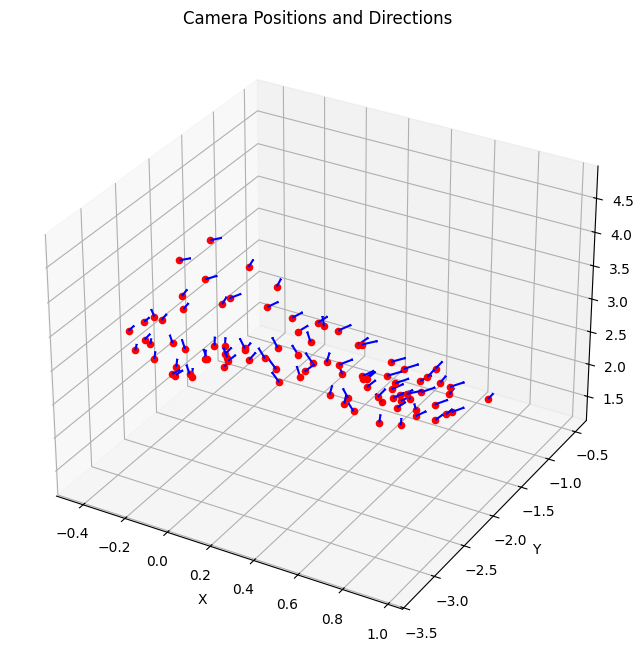

In [ ]:
# escolha qual threshold você quer visualizar
THR_TO_PLOT = 2.0  # mude para 0.5, 1, 4, 8 etc.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (ativa proj. 3D)

output_path = recon_dirs.get(THR_TO_PLOT, project_path / f"sparse_thr{thr_tag(THR_TO_PLOT)}")
reconstruction = pycolmap.Reconstruction(str(output_path))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for _, image in reconstruction.images.items():
    cam_from_world = image.cam_from_world()
    cam_pos = cam_from_world.translation
    ax.scatter(cam_pos[0], cam_pos[1], cam_pos[2], c='red', marker='o')

    # orientação "forward" aproximada da câmera (eixo -Z da câmera no mundo)
    R = cam_from_world.rotation.matrix()
    forward_dir = R @ np.array([0, 0, 1])  # ajuste se preferir outro eixo
    ax.quiver(
        cam_pos[0], cam_pos[1], cam_pos[2],
        forward_dir[0], forward_dir[1], forward_dir[2],
        length=0.1, color='blue', arrow_length_ratio=0.1
    )

ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.set_title(f'Camera Positions and Directions — thr={THR_TO_PLOT}px')
plt.tight_layout()
plt.show()

### Passo 5.2: Visualização dos Resultados

Vamos carregar o modelo esparso que acabamos de criar e visualizá-lo. Inicialmente, a visualização é feita de forma estática com matplotlib. Em seguida, você poderá usar o mouse para rotacionar, dar zoom e mover a cena 3D a partir do plot com plotly. Os cones em vermelho representam as câmeras.

In [ ]:
output_path = recon_dirs.get(THR_TO_PLOT, project_path / f"sparse_thr{thr_tag(THR_TO_PLOT)}")
reconstruction = pycolmap.Reconstruction(str(output_path))

# Coleta pontos 3D
pts = [p.xyz for _, p in reconstruction.points3D.items()]
points_3d = np.array(pts) if len(pts) else np.zeros((0,3))
print(f"Número de pontos 3D (thr={THR_TO_PLOT}px): {len(points_3d)}")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

if len(points_3d):
    ax.scatter(points_3d[:,0], points_3d[:,1], points_3d[:,2], s=1, c='blue', alpha=0.5, label='Estimated Object')

# Cámeras
for _, img in reconstruction.images.items():
    T = img.cam_from_world()
    c = T.translation
    ax.scatter(c[0], c[1], c[2], c='red', marker='^', label='Camera')

ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.legend(loc='upper left')
ax.set_title(f"Estimated Object + Cameras — thr={THR_TO_PLOT}px")
plt.tight_layout()
plt.show()

Números de pontos 3D: 34347
Coordenadas do primeiro ponto: [0.30461158 2.52541063 2.39029289]


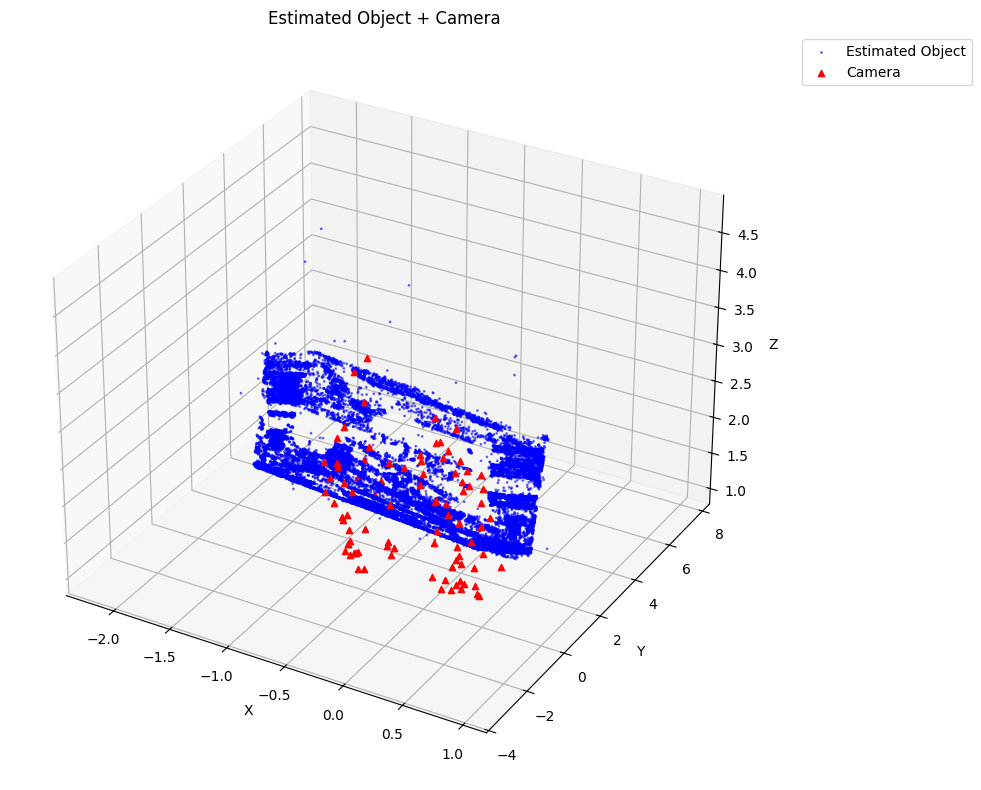

In [ ]:
import numpy as np
import plotly.graph_objects as go

output_path = recon_dirs.get(THR_TO_PLOT, project_path / f"sparse_thr{thr_tag(THR_TO_PLOT)}")
reconstruction = pycolmap.Reconstruction(str(output_path))

# Pontos
pts = [p.xyz for _, p in reconstruction.points3D.items()]
points_3d = np.array(pts) if len(pts) else np.zeros((0,3))

# Câmeras
cam_x, cam_y, cam_z = [], [], []
for _, img in reconstruction.images.items():
    T = img.cam_from_world()
    c = T.translation
    cam_x.append(c[0]); cam_y.append(c[1]); cam_z.append(c[2])

fig = go.Figure()
if len(points_3d):
    fig.add_trace(go.Scatter3d(
        x=points_3d[:,0], y=points_3d[:,1], z=points_3d[:,2],
        mode='markers',
        marker=dict(size=1.5, color='blue', opacity=0.6),
        name='Estimated Object'
    ))

fig.add_trace(go.Cone(
    x=np.array(cam_x), y=np.array(cam_y), z=np.array(cam_z),
    u=np.zeros_like(cam_x), v=np.zeros_like(cam_y), w=np.ones_like(cam_z),
    sizemode='absolute', sizeref=20, anchor="tip",
    colorscale='Reds', showscale=False, name='Camera'
))

fig.update_layout(
    title_text=f"Visualização da Nuvem Esparsa 3D — thr={THR_TO_PLOT}px",
    scene=dict(xaxis_title='x', yaxis_title='y', zaxis_title='z',
               aspectratio=dict(x=1, y=1, z=1)),
    margin=dict(l=0, r=0, b=0, t=40),
    showlegend=True
)
fig.show()

No plot 3D, a ponta do cone representa a localização da lente da câmera.

### (Opcional) Passo 6: Reconstrução Densa (Multi-View Stereo)

O resultado acima é uma "nuvem de pontos esparsa". Para obter um modelo 3D mais detalhado, podemos realizar a reconstrução densa. Isso gera um mapa de profundidade para cada imagem e depois os funde em uma nuvem de pontos densa.

**AVISO: Este processo é computacionalmente muito mais intensivo.**

In [ ]:
import subprocess
from pathlib import Path

def run(cmd):
    print("$", " ".join(map(str, cmd)))
    subprocess.run(cmd, check=True)

# Parâmetros densa (ajuste se quiser)
MAX_IMAGE_SIZE = 2000         # redimensiona para acelerar MVS (0 = sem limite)
GPU_INDEX = 0                 # use -1 para CPU
GEOM_CONSISTENCY = True       # melhora robustez (mais lento)
MIN_TRI_ANGLE = 3             # graus; ajuda em cenas com baseline pequeno
MIN_NUM_CONSISTENT = 2        # exigido na fusão

for thr in THRESHOLDS:
    tag = thr_tag(thr)
    sparse_dir = project_path / f"sparse_thr{tag}"
    dense_dir  = project_path / f"dense_thr{tag}"
    undist_dir = dense_dir / "undistorted"
    fused_ply  = dense_dir / "fused.ply"

    dense_dir.mkdir(parents=True, exist_ok=True)

    # 6.1 Undistort (prepara workspace COLMAP para MVS)
    run([
        "colmap", "image_undistorter",
        "--image_path",   str(image_path),
        "--input_path",   str(sparse_dir),     # modelo esparso (cameras+images+points3D.bin/txt)
        "--output_path",  str(undist_dir),
        "--output_type",  "COLMAP",
        "--max_image_size", str(MAX_IMAGE_SIZE),
    ])

    # 6.2 PatchMatch Stereo (estima profundidade + normal por imagem)
    cmd_pms = [
        "colmap", "patch_match_stereo",
        "--workspace_path",  str(undist_dir),
        "--workspace_format","COLMAP",
        "--PatchMatchStereo.gpu_index", str(GPU_INDEX),
        "--PatchMatchStereo.min_triangulation_angle", str(MIN_TRI_ANGLE),
    ]
    if GEOM_CONSISTENCY:
        cmd_pms += ["--PatchMatchStereo.geom_consistency", "true"]
    run(cmd_pms)

    # 6.3 Stereo Fusion (funde mapas de profundidade em nuvem densa)
    run([
        "colmap", "stereo_fusion",
        "--workspace_path",  str(undist_dir),
        "--workspace_format","COLMAP",
        "--output_path",     str(fused_ply),
        "--StereoFusion.min_num_consistent", str(MIN_NUM_CONSISTENT),
    ])

    print(f"[thr={thr}px] Denso concluído -> {fused_ply}")

AttributeError: 'pycolmap._core.Reconstruction' object has no attribute 'is_empty'

In [ ]:
import numpy as np

def load_ply_xyz(path):
    # leitorzinho simples para PLY ASCII ou binário little-endian sem atributos extras
    with open(path, "rb") as f:
        header = []
        while True:
            line = f.readline().decode("ascii").rstrip()
            header.append(line)
            if line.startswith("end_header"):
                break
        is_binary = any("binary_little_endian" in h for h in header)
        props = [h for h in header if h.startswith("property")]
        has_rgb = any("uchar red" in h for h in props)
    if is_binary:
        import struct
        with open(path, "rb") as f:
            data = f.read()
        head = ("\n".join(header) + "\n").encode("ascii")
        payload = data[len(head):]
        rec_size = 12 + (3 if has_rgb else 0)  # 3*float32 + opcional 3*uchar
        n = len(payload) // rec_size
        pts = np.zeros((n,3), np.float32)
        for i in range(n):
            x,y,z = struct.unpack_from("<fff", payload, i*rec_size)
            pts[i] = (x,y,z)
    else:
        pts = []
        with open(path, "r") as f:
            lines = f.read().splitlines()
        end = lines.index("end_header")
        for l in lines[end+1:]:
            parts = l.split()
            if len(parts) >= 3:
                pts.append([float(parts[0]), float(parts[1]), float(parts[2])])
        pts = np.array(pts, dtype=np.float32)
    return pts

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa

THR_TO_PLOT_DENSE = 2.0
ply_path = project_path / f"dense_thr{thr_tag(THR_TO_PLOT_DENSE)}" / "fused.ply"
pts = load_ply_xyz(str(ply_path))
print("Pontos densos:", len(pts))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
if len(pts):
    ax.scatter(pts[::10,0], pts[::10,1], pts[::10,2], s=0.5, alpha=0.5)  # amostra 1/10 para plotar rápido
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")
ax.set_title(f"Dense fused (thr={THR_TO_PLOT_DENSE}px)")
plt.tight_layout(); plt.show()